# Modelo Lotka-Volterra a las especies del SARS COV-2
## Objetivos generales
```
1. Parametros LV
2. Diagramas de Fase
3. Evolución Temporal
4. Bifurcaciónes
5. Regiones de convergencia
```

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

### Base de Datos SARS COV-2
    > Estados Unidos
    > Asia Oriental
    > Asia Occidental
    > America del Sur

In [54]:
df = pd.read_csv('tabla.csv')
USA = ['USA-G1', 'USA-G2', 'USA-G3', 'USA-G4','USA-G5']
Asia1 = ['Asia1-G1', 'Asia1-G2', 'Asia1-G3', 'Asia1-G4']
Asia2 = ['Asia2-G1', 'Asia2-G2', 'Asia2-G3', 'Asia2-G4']
America =  ['AmerSur-G2', 'AmerSur-G3']

<Figure size 432x288 with 0 Axes>

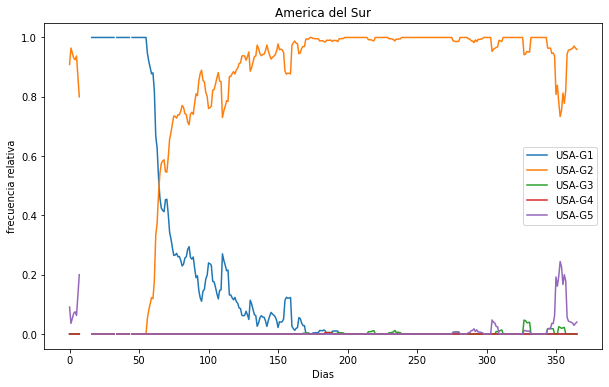

In [55]:
plt.figure()
df.plot(y=USA, title='America del Sur', xlabel='Dias', ylabel='frecuencia relativa', figsize=(10,6))
plt.show()

### Lista de especies en una region

In [56]:
USA1 = [USA[0], USA[1]]
lst = df[USA1].to_numpy()
rows, cols = np.shape(lst)
rows, cols

(366, 2)

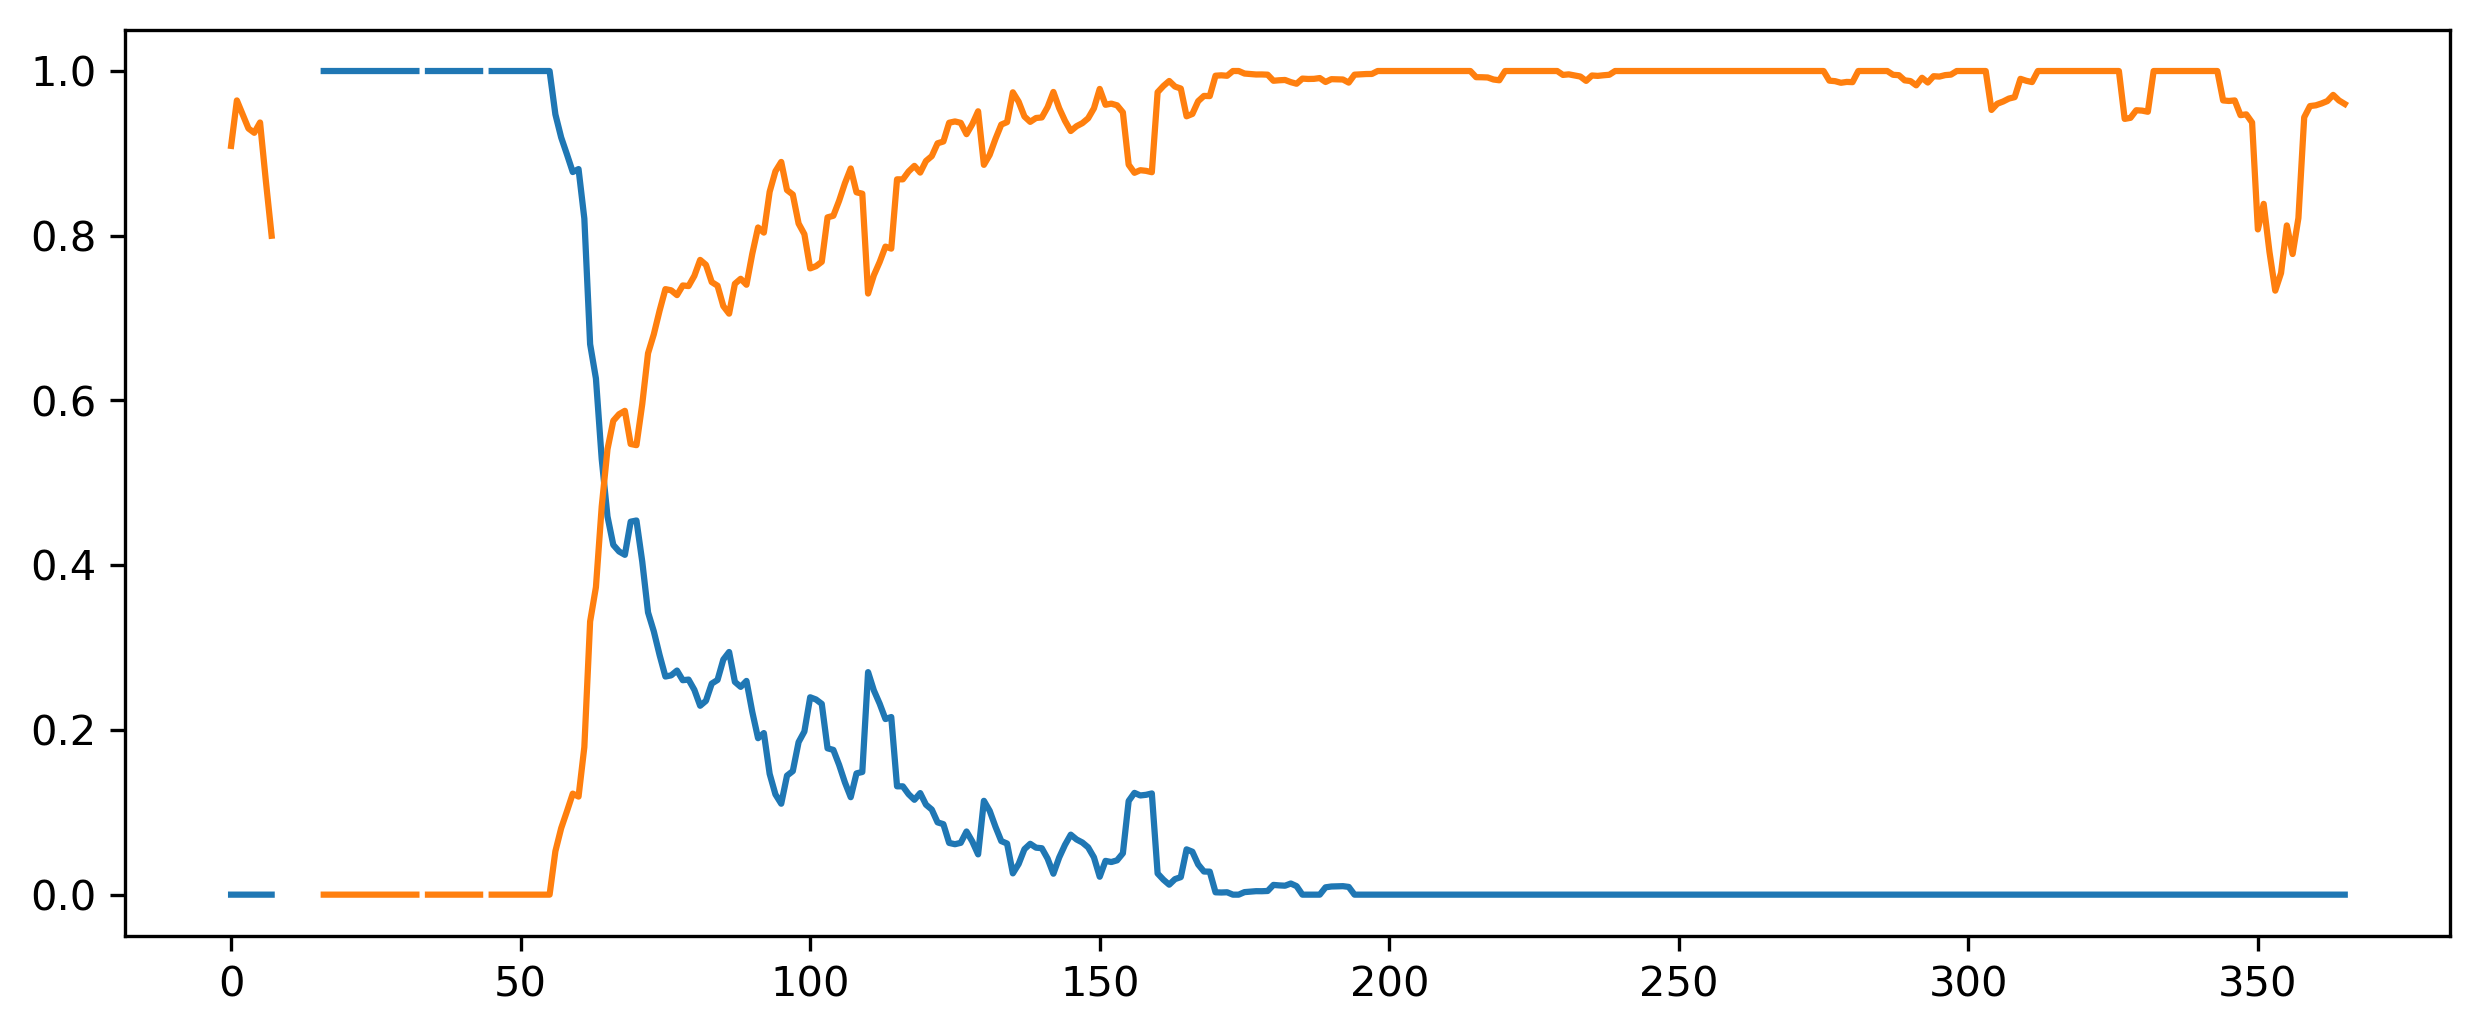

In [57]:
plt.figure(figsize=(10,4), dpi=300)
plt.plot(lst)

### Función INT
```
Algoritmo para calcular un arreglo matricial de un sistema de ecuaciónes para encontrar los parametros LV de cada especie
```
**return** - Retorna un arreglo matricial (n x 6) 

In [68]:
def INT(arr,idx):
    G = arr[:,idx]
    dd, l = [], []            # lista de listas
    for i in range(0,len(G)-1):
        d = []
        dd.append(G[i+1] - G[i])
        for j in range(0,arr.shape[1]):
            if (j==0):
                d_ = G[i] + G[i+1]
                d.append(d_/2)
            d_ = G[i]*arr[i,j] + G[i+1]*arr[i+1,j]
            d.append(d_/2)
        l.append(d)
        
    return np.array(dd), np.matrix(l)

In [83]:
d, A = [], []
for i in range(lst.shape[1]):
    d_, A_ = INT(lst, i)
    d.append(d_)
    A.append(A_)
d = np.array(d)
A = np.array(A)

In [121]:
d.shape

(2, 365)

In [112]:
tuple(linalg.solve(A[0][30:33],d[0][30:33]))

ValueError: array must not contain infs or NaNs

### Resolver el sistema de ecuaciónes

    j.amc.2013.08.093.pdf 
    doi: http://dx.doi.org/10.1016/j.amc.2013.08.093

In [128]:
# Ciclo del día 54 al día 160
i = 0
a0, b0, c0, a1, b1, c1 = [], [], [], [], [], []
while (i<61):
    for j in range(0,A.shape[0]):
        a_, b_, c_ = tuple(linalg.solve( A[j][i-3:i], d[j][i-3:i] ))
        if (j==0):
            a0.append(a_)
            b0.append(b_)
            c0.append(c_)
        elif (j==1):
            a1.append(a_)
            b1.append(b_)
            c1.append(c_)
    i += A.shape[2]

LinAlgError: Matrix is singular.

In [102]:
a0

[3309055.883698058]

/home/raul/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/raul/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/raul/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/raul/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/raul/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/raul/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

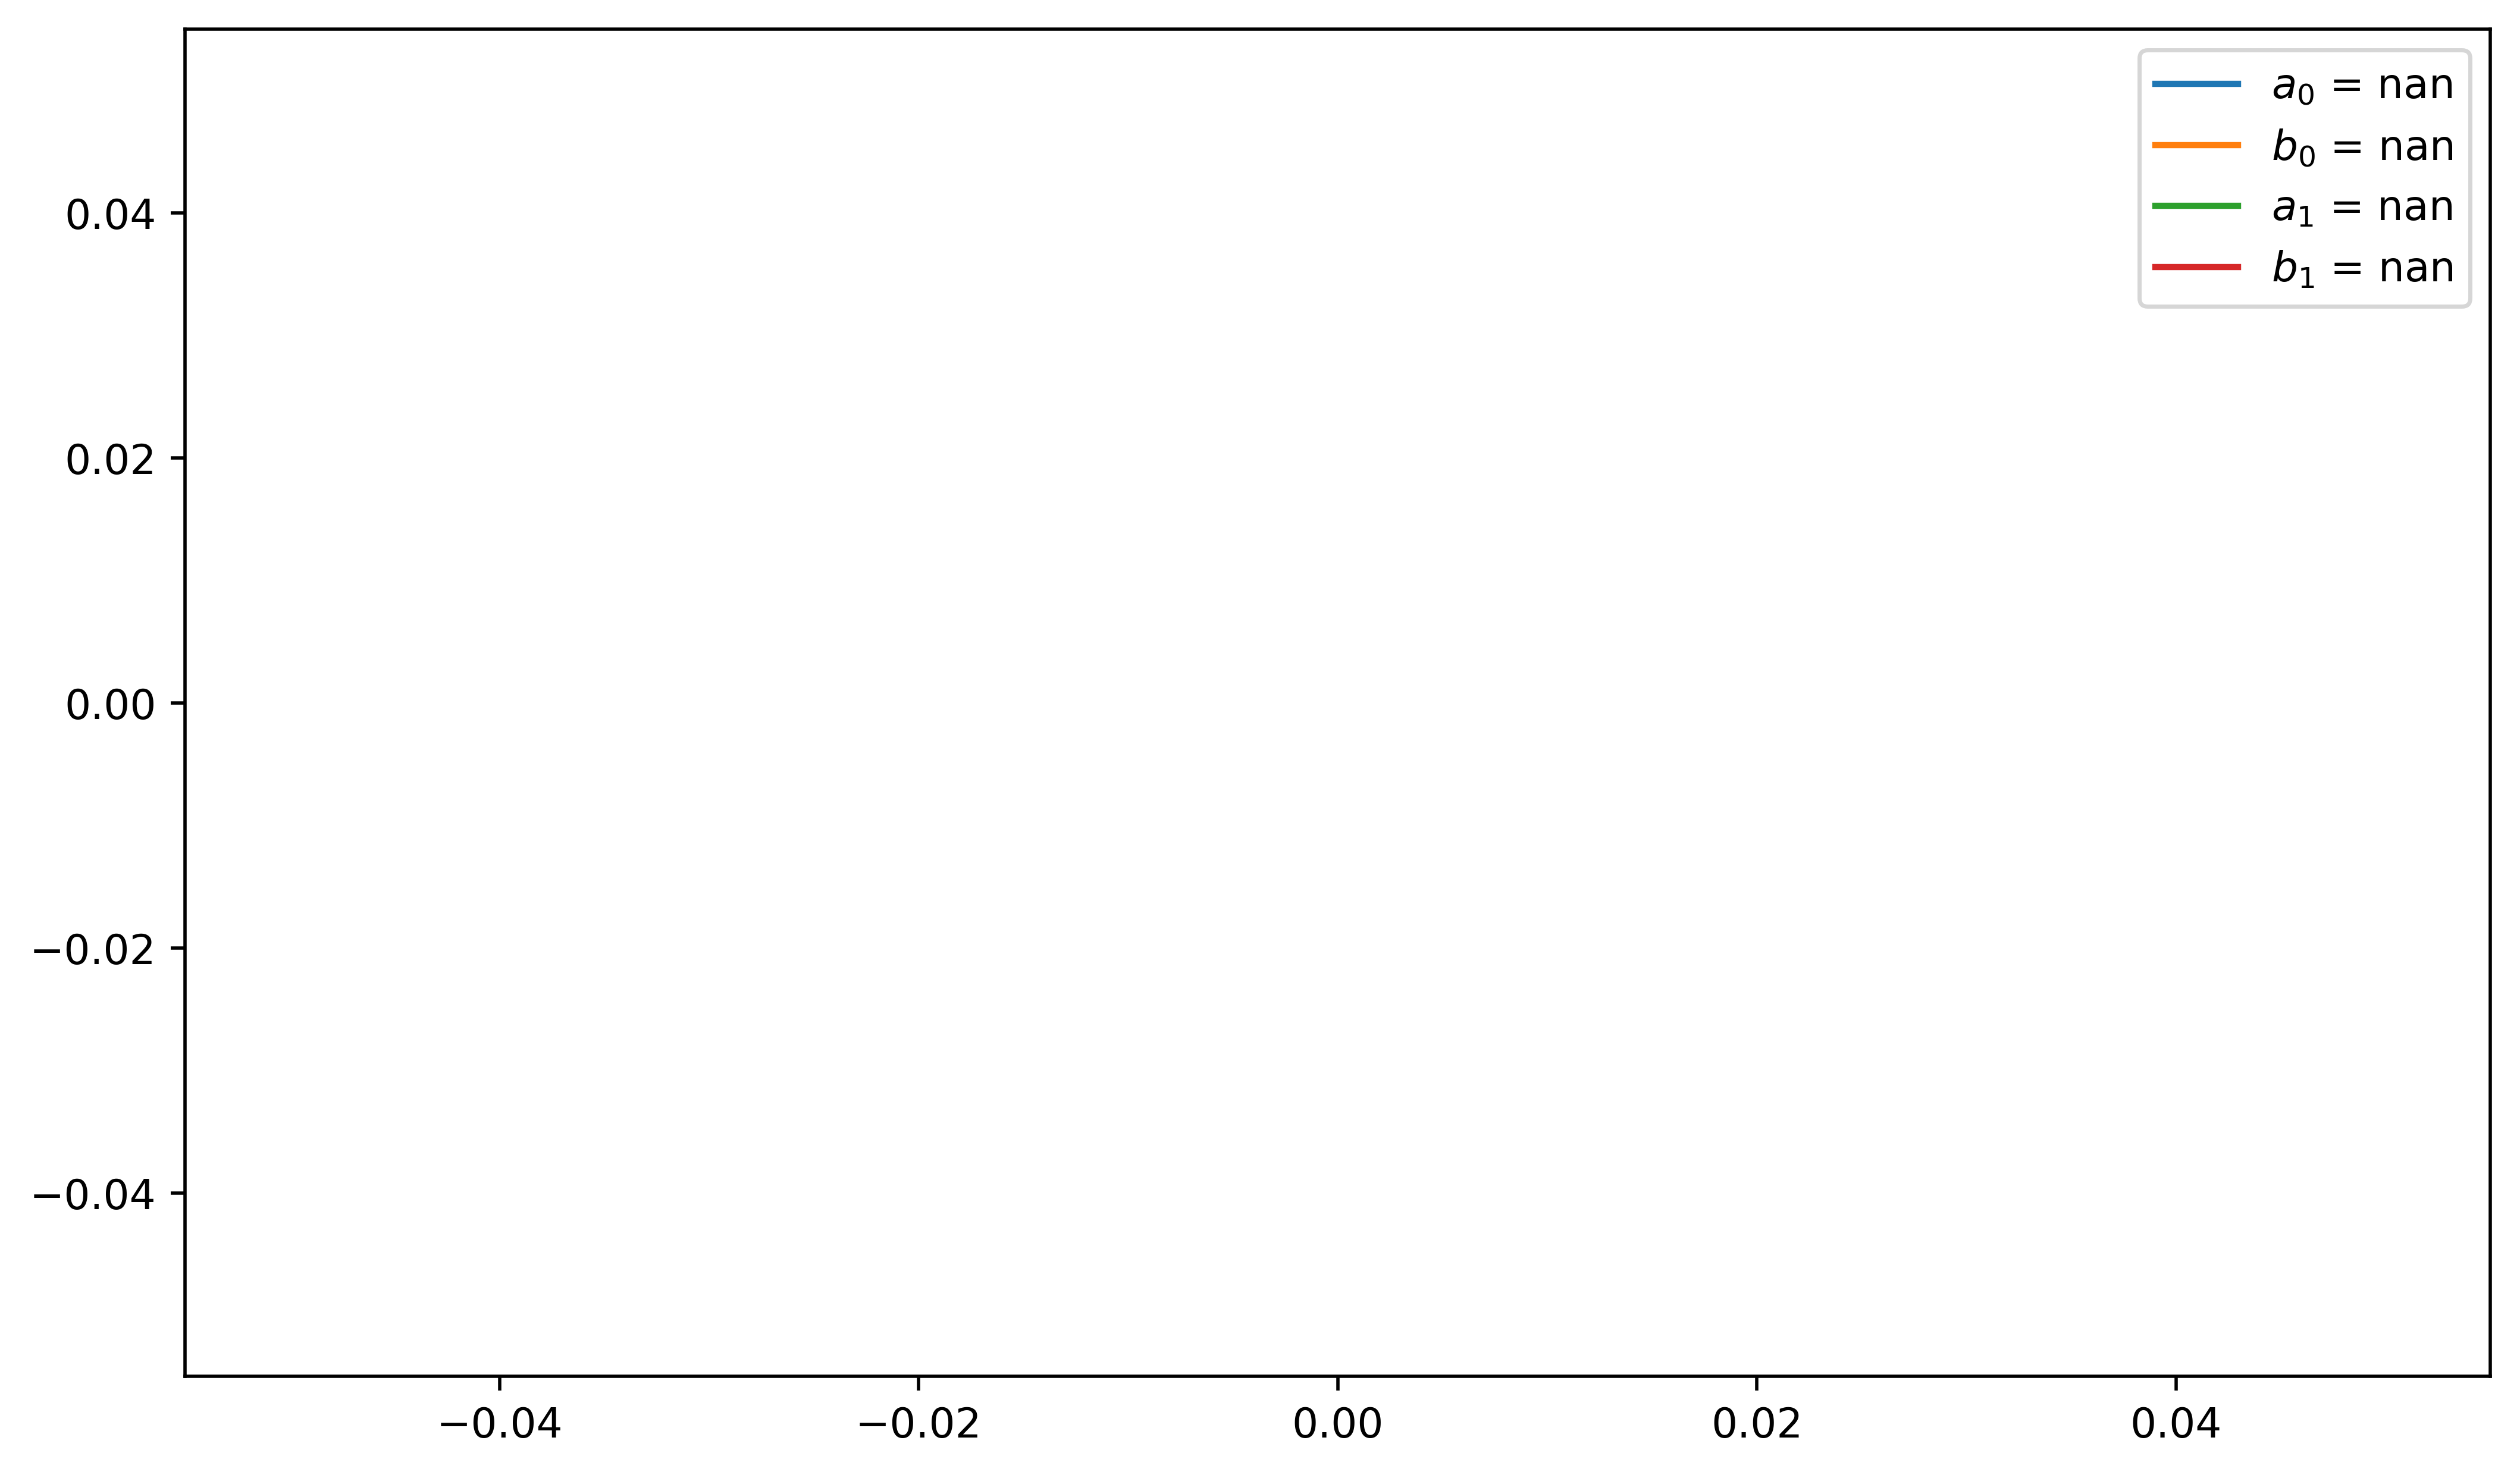

In [126]:
fig = plt.figure(figsize=(10,6),dpi=500)
plt.plot(np.arange(0,len(a0)), a0, label="$a_0$ = {:.4f}". format(np.mean(a0)))
plt.plot(np.arange(0,len(b0)), b0, label="$b_0$ = {:.4f}". format(np.mean(b0)))
plt.plot(np.arange(0,len(a1)), a1, label="$a_1$ = {:.4f}". format(np.mean(a1)))
plt.plot(np.arange(0,len(b1)), b1, label="$b_1$ = {:.4f}". format(np.mean(b1)))
#plt.axis('scaled')
plt.legend()

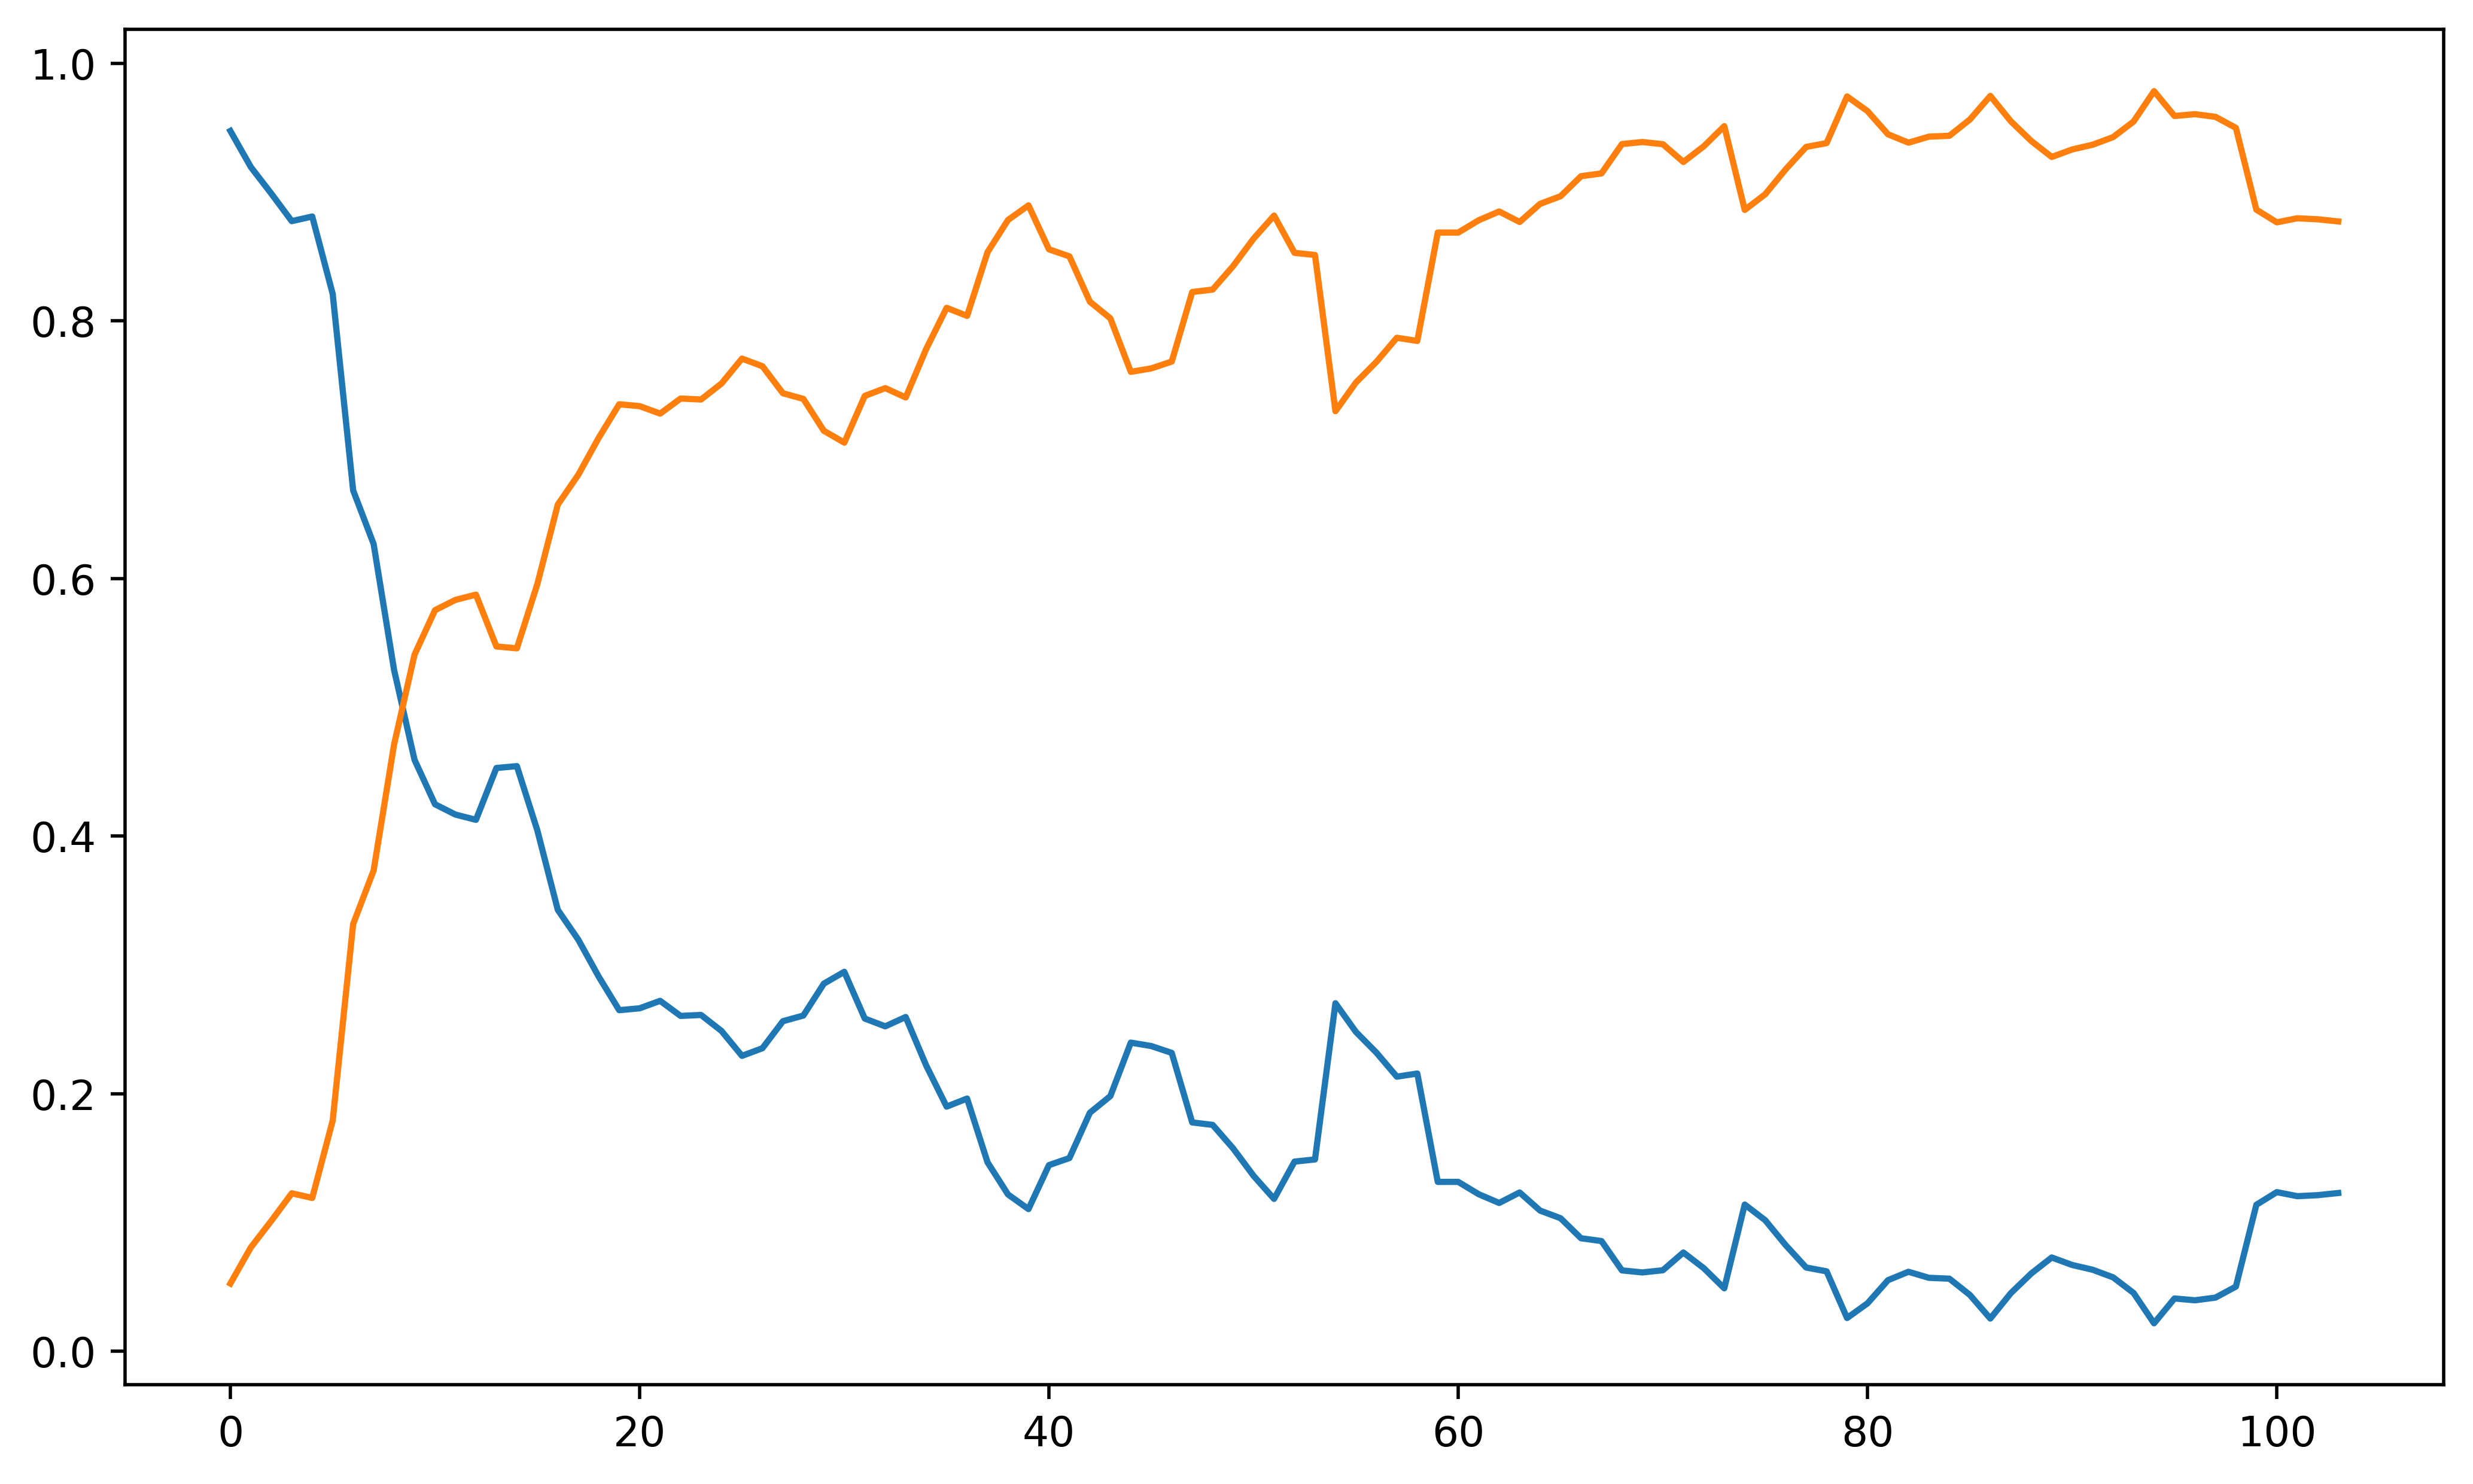

In [64]:
plt.figure(figsize=(10,6), dpi=500)
plt.plot(lst[56:160])

In [161]:
np.mean(a[0:59]), np.mean(b[0:59])

(0.9187428924073785, -0.6151117374715619)

In [128]:
 linalg.solve(A[0][56:58],d[0][56:58])

array([-0.04996044,  0.25031544])

In [131]:
 tuple(linalg.solve(A[0][54:56],d[0][54:56]))

(0.0, -2.1111119602469164)

LinAlgError: Matrix is singular.

In [28]:
np.linalg.solve(B,C)

LinAlgError: Singular matrix

In [14]:
d[0]

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
                  nan,            nan,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,            nan,
                  nan,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -5.2631600e-02,
      